In [37]:
import requests as req
import json
import pandas as pd
import numpy as np
import datetime
import os
from matplotlib.finance import candlestick2_ohlc
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [38]:
files = os.listdir('historical_data')
for file in files:
    if file[0:3]=='BTC':
        btc_df = pd.read_csv('historical_data/%s'%file)
        print('BTC dataframe generated')
    elif file[0:3]=='ETH':
        eth_df = pd.read_csv('historical_data/%s'%file)
        print('ETH dataframe generated')
    elif file[0:3]=='LTC':
        ltc_df =  pd.read_csv('historical_data/%s'%file)
        print('LTC dataframe generated')
btc_df.head()

BTC dataframe generated
ETH dataframe generated
LTC dataframe generated


,Date,High,Low,Open,Close
0,2013-04-08,266.00,105.00,187.50,124.90
1,2013-04-11,140.00,54.25,124.90,90.00
2,2013-04-14,102.00,50.01,90.00,93.07
3,2013-04-17,136.43,86.00,93.07,126.62
4,2013-04-20,144.02,110.00,126.62,143.48


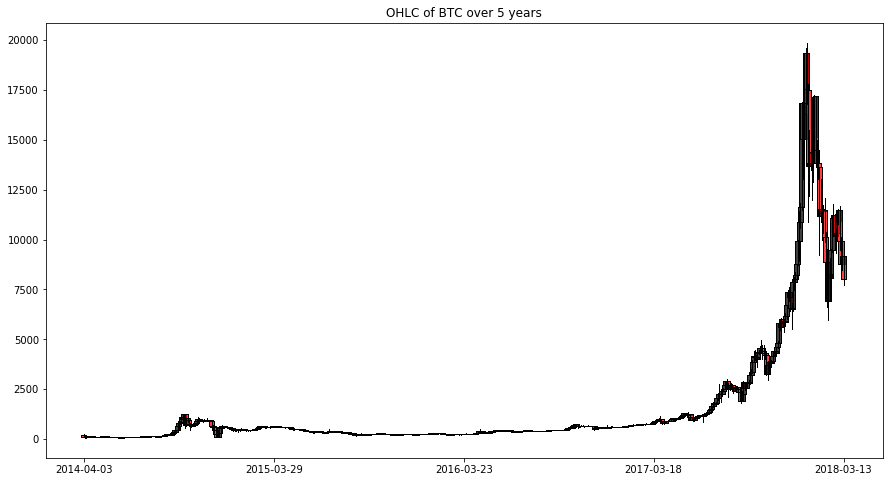

In [39]:
fig, ax = plt.subplots()
fig.set_size_inches(w=15,h=8,forward=True)
candlestick2_ohlc(ax,btc_df['Open'],btc_df['High'],btc_df['Low'],btc_df['Close'])
plt.title('OHLC of BTC over 5 years')

num_ticks = 5

inv_ticks = int(len(btc_df['Date'])/num_ticks)
plt.xticks([i for i in range(num_ticks)],[btc_df['Date'][inv_ticks*i] for i in range(num_ticks+1)])
ax.xaxis.set_major_locator(ticker.MaxNLocator(num_ticks))
plt.show()


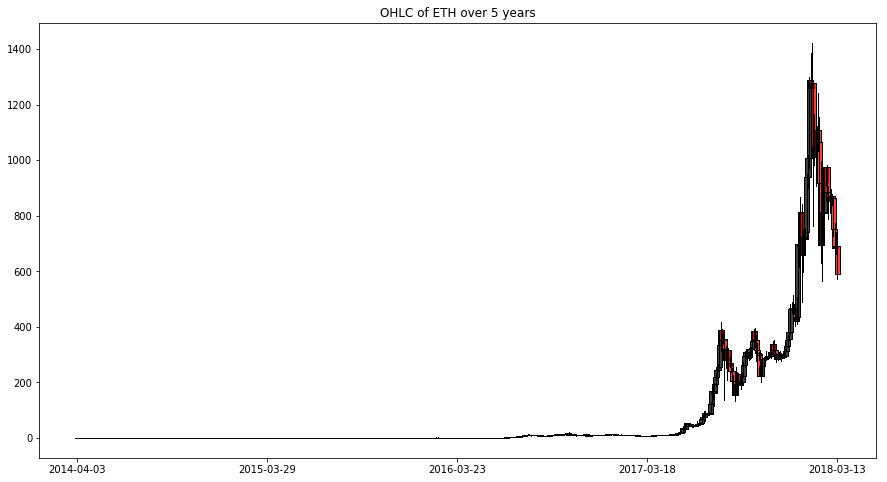

In [40]:
fig, ax = plt.subplots()
fig.set_size_inches(w=15,h=8,forward=True)
candlestick2_ohlc(ax,eth_df['Open'],eth_df['High'],eth_df['Low'],eth_df['Close'])
plt.title('OHLC of ETH over 5 years')

num_ticks = 5

inv_ticks = int(len(eth_df['Date'])/num_ticks)
plt.xticks([i for i in range(num_ticks)],[eth_df['Date'][inv_ticks*i] for i in range(num_ticks+1)])
ax.xaxis.set_major_locator(ticker.MaxNLocator(num_ticks))
plt.show()


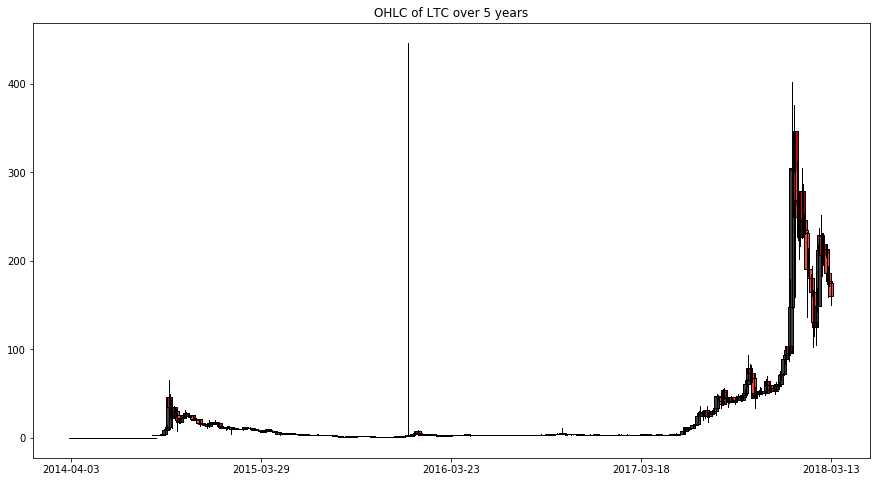

In [41]:
fig, ax = plt.subplots()
fig.set_size_inches(w=15,h=8,forward=True)
candlestick2_ohlc(ax,ltc_df['Open'],ltc_df['High'],ltc_df['Low'],ltc_df['Close'])
plt.title('OHLC of LTC over 5 years')

num_ticks = 5

inv_ticks = int(len(ltc_df['Date'])/num_ticks)
plt.xticks([i for i in range(num_ticks)],[ltc_df['Date'][inv_ticks*i] for i in range(num_ticks+1)])
ax.xaxis.set_major_locator(ticker.MaxNLocator(num_ticks))
plt.show()

# Open flucation analysis (velocity)

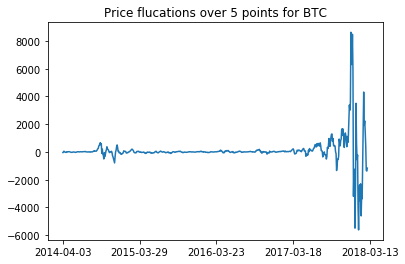

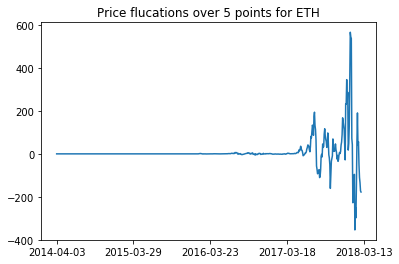

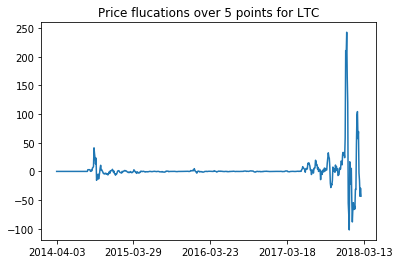

In [42]:
btc_differences = list()
eth_differences = list()
ltc_differences = list()

step = 5

for i in range(len(btc_df['Open'])-step):
    btc_differences.append(btc_df['Open'][i+step]-btc_df['Open'][i])
    eth_differences.append(eth_df['Open'][i+step]-eth_df['Open'][i])
    ltc_differences.append(ltc_df['Open'][i+step]-ltc_df['Open'][i])


num_ticks = 5

inv_ticks = int(len(btc_df['Date'])/num_ticks)
    
    
fig, ax = plt.subplots()
plt.plot(btc_differences)
plt.title('Price flucations over %s points for BTC'%str(step))
plt.xticks([i for i in range(num_ticks)],[btc_df['Date'][inv_ticks*i] for i in range(num_ticks+1)])
ax.xaxis.set_major_locator(ticker.MaxNLocator(num_ticks))
plt.show()
fig, ax = plt.subplots()
plt.plot(eth_differences)
plt.title('Price flucations over %s points for ETH'%str(step))
plt.xticks([i for i in range(num_ticks)],[eth_df['Date'][inv_ticks*i] for i in range(num_ticks+1)])
ax.xaxis.set_major_locator(ticker.MaxNLocator(num_ticks))
plt.show()
fig, ax = plt.subplots()
plt.plot(ltc_differences)
plt.title('Price flucations over %s points for LTC'%str(step))
plt.xticks([i for i in range(num_ticks)],[ltc_df['Date'][inv_ticks*i] for i in range(num_ticks+1)])
ax.xaxis.set_major_locator(ticker.MaxNLocator(num_ticks))
plt.show()

In [43]:
top20 = int(len(btc_differences)/5)
top_index_btc = sorted(range(len(btc_differences)), key=lambda i: btc_differences[i])[-top20:]
top_btc = [btc_differences[i] for i in top_index_btc]
top_btc[0:5]

[96.6099999999999,
 97.649999999999977,
 102.87,
 108.22000000000003,
 120.59000000000003]

# Open flucation analysis (acceleration)

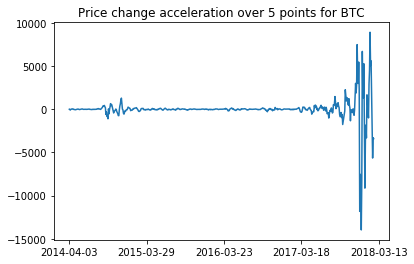

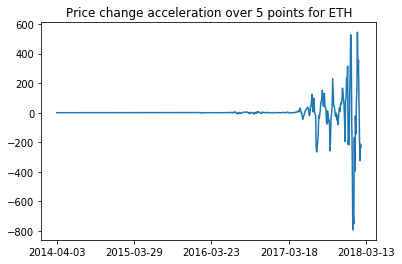

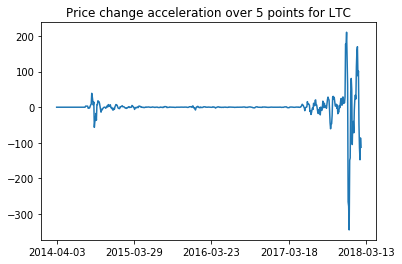

In [44]:
btc_accel = list()
eth_accel = list()
ltc_accel = list()

step = 5

for i in range(len(btc_differences)-step):
    btc_accel.append(btc_differences[i+step]-btc_differences[i])
    eth_accel.append(eth_differences[i+step]-eth_differences[i])
    ltc_accel.append(ltc_differences[i+step]-ltc_differences[i])

num_ticks = 5

inv_ticks = int(len(btc_df['Date'])/num_ticks)
    
    
fig, ax = plt.subplots()
plt.plot(btc_accel)
plt.title('Price change acceleration over %s points for BTC'%str(step))
plt.xticks([i for i in range(num_ticks)],[btc_df['Date'][inv_ticks*i] for i in range(num_ticks+1)])
ax.xaxis.set_major_locator(ticker.MaxNLocator(num_ticks))
plt.show()
fig, ax = plt.subplots()
plt.plot(eth_accel)
plt.title('Price change acceleration over %s points for ETH'%str(step))
plt.xticks([i for i in range(num_ticks)],[eth_df['Date'][inv_ticks*i] for i in range(num_ticks+1)])
ax.xaxis.set_major_locator(ticker.MaxNLocator(num_ticks))
plt.show()
fig, ax = plt.subplots()
plt.plot(ltc_accel)
plt.title('Price change acceleration over %s points for LTC'%str(step))
plt.xticks([i for i in range(num_ticks)],[ltc_df['Date'][inv_ticks*i] for i in range(num_ticks+1)])
ax.xaxis.set_major_locator(ticker.MaxNLocator(num_ticks))
plt.show()

In [45]:
# find sign changes in acceleration analysis
signs = np.sign(btc_accel)
sign_changes_btc = ((np.roll(signs, 1) - signs) != 0).astype(int)
unique, counts = np.unique(sign_changes_btc,return_counts=True)
print(np.asarray((unique, counts)).T)

signs = np.sign(eth_accel)
sign_changes_eth = ((np.roll(signs, 1) - signs) != 0).astype(int)
unique, counts = np.unique(sign_changes_eth,return_counts=True)
print(np.asarray((unique, counts)).T)

signs = np.sign(ltc_accel)
sign_changes_ltc = ((np.roll(signs, 1) - signs) != 0).astype(int)
unique, counts = np.unique(sign_changes_ltc,return_counts=True)
print(np.asarray((unique, counts)).T)

[[  0 451]
 [  1 140]]
[[  0 520]
 [  1  71]]
[[  0 458]
 [  1 133]]


# Velocity combined with Acceleration Analysis

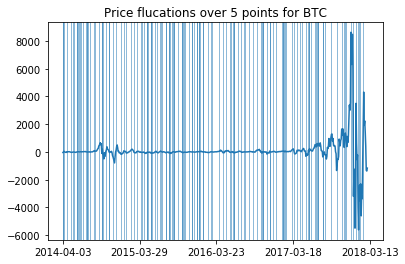

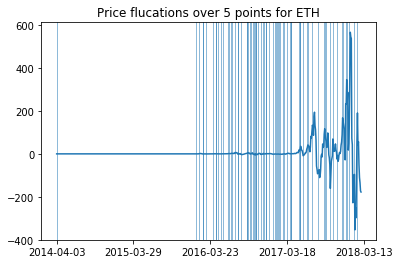

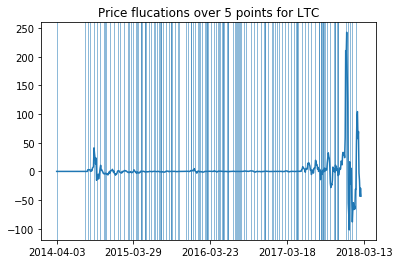

In [46]:
sign_changes_btc_normalized = np.append(sign_changes_btc,[0,0,0,0,0])
sign_changes_eth_normalized = np.append(sign_changes_eth,[0,0,0,0,0])
sign_changes_ltc_normalized = np.append(sign_changes_ltc,[0,0,0,0,0])

num_ticks = 5

inv_ticks = int(len(btc_df['Date'])/num_ticks)
    
xlist = [i for i in range(len(sign_changes_btc_normalized))]
    
fig, ax = plt.subplots()
plt.plot(btc_differences)
for x in xlist:
    if sign_changes_btc_normalized[x]==1:
        plt.axvline(x=x,linewidth=0.5)
plt.title('Price flucations over %s points for BTC'%str(step))
plt.xticks([i for i in range(num_ticks)],[btc_df['Date'][inv_ticks*i] for i in range(num_ticks+1)])
ax.xaxis.set_major_locator(ticker.MaxNLocator(num_ticks))
plt.show()
fig, ax = plt.subplots()
plt.plot(eth_differences)
for x in xlist:
    if sign_changes_eth_normalized[x]==1:
        plt.axvline(x=x,linewidth=0.5)
plt.title('Price flucations over %s points for ETH'%str(step))
plt.xticks([i for i in range(num_ticks)],[eth_df['Date'][inv_ticks*i] for i in range(num_ticks+1)])
ax.xaxis.set_major_locator(ticker.MaxNLocator(num_ticks))
plt.show()
fig, ax = plt.subplots()
plt.plot(ltc_differences)
for x in xlist:
    if sign_changes_ltc_normalized[x]==1:
        plt.axvline(x=x,linewidth=0.5)
plt.title('Price flucations over %s points for LTC'%str(step))
plt.xticks([i for i in range(num_ticks)],[ltc_df['Date'][inv_ticks*i] for i in range(num_ticks+1)])
ax.xaxis.set_major_locator(ticker.MaxNLocator(num_ticks))
plt.show()

# The above replots the velocity analysis and highlights the detected events with vertical lines

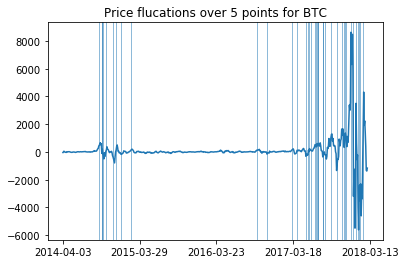

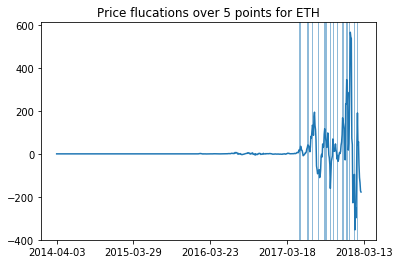

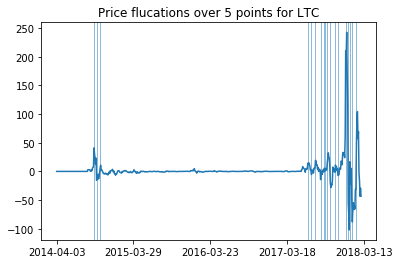

In [47]:
# Setting minimum limits for significant event
btc_lim = 100
eth_lim = 15
ltc_lim = 5
 

num_ticks = 5

inv_ticks = int(len(btc_df['Date'])/num_ticks)
    
xlist = [i for i in range(len(sign_changes_btc_normalized))]
    
fig, ax = plt.subplots()
plt.plot(btc_differences)
for x in xlist:
    if sign_changes_btc_normalized[x]==1 and (btc_differences[x]>btc_lim or btc_differences[x]<-btc_lim):
        plt.axvline(x=x,linewidth=0.5)
plt.title('Price flucations over %s points for BTC'%str(step))
plt.xticks([i for i in range(num_ticks)],[btc_df['Date'][inv_ticks*i] for i in range(num_ticks+1)])
ax.xaxis.set_major_locator(ticker.MaxNLocator(num_ticks))
plt.show()
fig, ax = plt.subplots()
plt.plot(eth_differences)
for x in xlist:
    if sign_changes_eth_normalized[x]==1 and (eth_differences[x]>eth_lim or eth_differences[x]<-eth_lim):
        plt.axvline(x=x,linewidth=0.5)
plt.title('Price flucations over %s points for ETH'%str(step))
plt.xticks([i for i in range(num_ticks)],[eth_df['Date'][inv_ticks*i] for i in range(num_ticks+1)])
ax.xaxis.set_major_locator(ticker.MaxNLocator(num_ticks))
plt.show()
fig, ax = plt.subplots()
plt.plot(ltc_differences)
for x in xlist:
    if sign_changes_ltc_normalized[x]==1 and (ltc_differences[x]>ltc_lim or ltc_differences[x]<-ltc_lim):
        plt.axvline(x=x,linewidth=0.5)
plt.title('Price flucations over %s points for LTC'%str(step))
plt.xticks([i for i in range(num_ticks)],[ltc_df['Date'][inv_ticks*i] for i in range(num_ticks+1)])
ax.xaxis.set_major_locator(ticker.MaxNLocator(num_ticks))
plt.show()

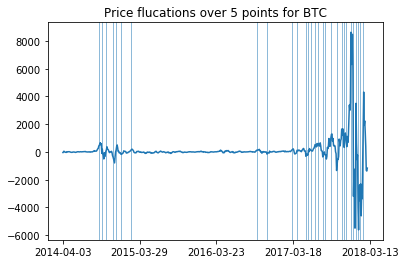

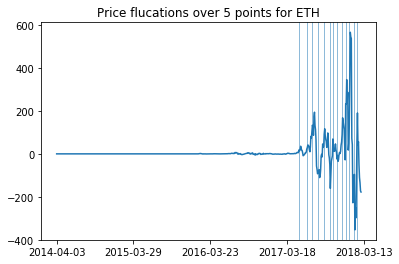

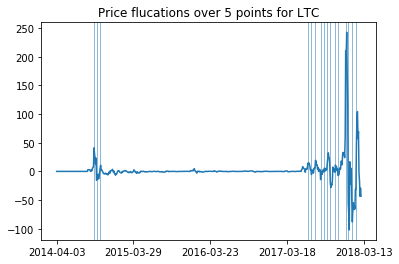

In [48]:
# Setting additional limits to cut down on noise by only looking at changes after a period of relative stability

btc_lim = 100
eth_lim = 15
ltc_lim = 5
recent_change_lim=3

recent_change_count=0

btc_event_index_list = list()
eth_event_index_list = list()
ltc_event_index_list = list()


num_ticks = 5

inv_ticks = int(len(btc_df['Date'])/num_ticks)
    
xlist = [i for i in range(len(sign_changes_btc_normalized))]
    
fig, ax = plt.subplots()
plt.plot(btc_differences)
for x in xlist:
    if recent_change_count >= recent_change_lim:
        if sign_changes_btc_normalized[x]==1 and (btc_differences[x]>btc_lim or btc_differences[x]<-btc_lim):
            plt.axvline(x=x,linewidth=0.5)
            recent_change_count=0
            btc_event_index_list.append(x)
        else:
            recent_change_count += 1
    else:
        recent_change_count += 1
plt.title('Price flucations over %s points for BTC'%str(step))
plt.xticks([i for i in range(num_ticks)],[btc_df['Date'][inv_ticks*i] for i in range(num_ticks+1)])
ax.xaxis.set_major_locator(ticker.MaxNLocator(num_ticks))
plt.show()
fig, ax = plt.subplots()
plt.plot(eth_differences)
for x in xlist:
    if recent_change_count >= recent_change_lim:
        if sign_changes_eth_normalized[x]==1 and (eth_differences[x]>eth_lim or eth_differences[x]<-eth_lim):
            plt.axvline(x=x,linewidth=0.5)
            recent_change_count=0
            eth_event_index_list.append(x)
        else:
            recent_change_count += 1
    else:
        recent_change_count += 1
plt.title('Price flucations over %s points for ETH'%str(step))
plt.xticks([i for i in range(num_ticks)],[eth_df['Date'][inv_ticks*i] for i in range(num_ticks+1)])
ax.xaxis.set_major_locator(ticker.MaxNLocator(num_ticks))
plt.show()
fig, ax = plt.subplots()
plt.plot(ltc_differences)
for x in xlist:
    if recent_change_count >= recent_change_lim:
        if sign_changes_ltc_normalized[x]==1 and (ltc_differences[x]>ltc_lim or ltc_differences[x]<-ltc_lim):
            plt.axvline(x=x,linewidth=0.5)
            recent_change_count=0
            ltc_event_index_list.append(x)
        else:
            recent_change_count += 1
    else:
        recent_change_count += 1
plt.title('Price flucations over %s points for LTC'%str(step))
plt.xticks([i for i in range(num_ticks)],[ltc_df['Date'][inv_ticks*i] for i in range(num_ticks+1)])
ax.xaxis.set_major_locator(ticker.MaxNLocator(num_ticks))
plt.show()

In [49]:
values, counts = np.unique((btc_event_index_list-np.roll(btc_event_index_list,1)),return_counts=True)
print(np.asarray((values, counts)).T)
values, counts = np.unique((eth_event_index_list-np.roll(eth_event_index_list,1)),return_counts=True)
print(np.asarray((values, counts)).T)
values, counts = np.unique((ltc_event_index_list-np.roll(ltc_event_index_list,1)),return_counts=True)
print(np.asarray((values, counts)).T)

[[-516    1]
 [   4    5]
 [   5    6]
 [   6    2]
 [   9    4]
 [  10    2]
 [  11    2]
 [  12    1]
 [  13    1]
 [  17    1]
 [  19    1]
 [  20    1]
 [  48    1]
 [ 247    1]]
[[-113    1]
 [   6    2]
 [   7    2]
 [   8    1]
 [   9    1]
 [  10    1]
 [  11    3]
 [  12    1]
 [  15    1]]
[[-513    1]
 [   5    3]
 [   6    2]
 [   7    4]
 [   8    2]
 [  10    1]
 [  11    1]
 [  15    1]
 [ 406    1]]


In [50]:
# The list of indices for significant events doesn't map perfectly to the original data frame, because the data was repeatedly
# aggregated over durations of *step* days.  The indices map to a frame that is 4 items less than the original data frame, so 
# I have added 2 to all elements in order to find the average date of each event
btc_event_index_list_normalized = [x+2 for x in btc_event_index_list]
eth_event_index_list_normalized = [x+2 for x in eth_event_index_list]
ltc_event_index_list_normalized = [x+2 for x in ltc_event_index_list]

In [51]:
btc_event_list = list()
eth_event_list = list()
ltc_event_list = list()

for i in btc_event_index_list_normalized:
    btc_event_list.append(btc_df['Date'][i])
for i in eth_event_index_list_normalized:
    eth_event_list.append(btc_df['Date'][i])
for i in ltc_event_index_list_normalized:
    ltc_event_list.append(btc_df['Date'][i])

In [52]:
btc_event_list

['2013-11-13',
 '2013-11-28',
 '2013-12-25',
 '2014-02-02',
 '2014-02-20',
 '2014-03-19',
 '2014-05-18',
 '2016-05-28',
 '2016-07-24',
 '2016-12-15',
 '2017-01-17',
 '2017-03-09',
 '2017-03-24',
 '2017-04-05',
 '2017-05-02',
 '2017-05-17',
 '2017-06-16',
 '2017-06-28',
 '2017-08-03',
 '2017-09-05',
 '2017-10-05',
 '2017-10-20',
 '2017-11-01',
 '2017-11-28',
 '2017-12-13',
 '2017-12-25',
 '2018-01-09',
 '2018-01-21',
 '2018-02-08']

In [53]:
eth_event_list

['2017-03-06',
 '2017-04-20',
 '2017-05-23',
 '2017-06-25',
 '2017-07-31',
 '2017-09-02',
 '2017-09-20',
 '2017-10-14',
 '2017-11-13',
 '2017-12-04',
 '2017-12-25',
 '2018-01-21',
 '2018-02-08']

In [54]:
ltc_event_list

['2013-11-19',
 '2013-12-04',
 '2013-12-25',
 '2017-04-26',
 '2017-05-17',
 '2017-06-07',
 '2017-07-10',
 '2017-07-31',
 '2017-08-18',
 '2017-09-05',
 '2017-10-05',
 '2017-10-20',
 '2017-12-04',
 '2017-12-19',
 '2018-01-12',
 '2018-02-05']

# Plotting significant dates across all tracked cyrpto currencies

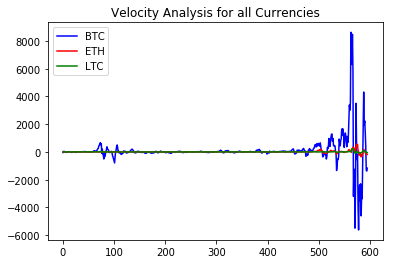

In [55]:
plt.plot(btc_differences,'b')
plt.plot(eth_differences,'r')
plt.plot(ltc_differences,'g')
plt.legend(['BTC','ETH','LTC'])
plt.title('Velocity Analysis for all Currencies')
plt.show()

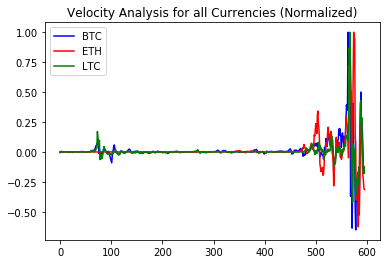

In [57]:
# Normalizing Axes
btc_differences_normalized = [x/max(btc_differences) for x in btc_differences]
eth_differences_normalized = [x/max(eth_differences) for x in eth_differences]
ltc_differences_normalized = [x/max(ltc_differences) for x in ltc_differences]

plt.plot(btc_differences_normalized,'b')
plt.plot(eth_differences_normalized,'r')
plt.plot(ltc_differences_normalized,'g')
plt.legend(['BTC','ETH','LTC'])
plt.title('Velocity Analysis for all Currencies (Normalized)')
plt.show()

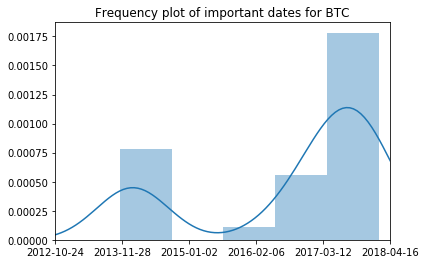

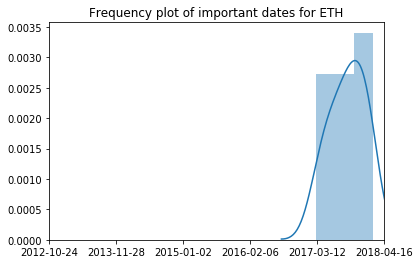

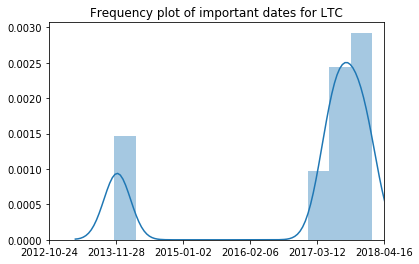

In [58]:
datetime_list_btc = [datetime.datetime.strptime(x,'%Y-%m-%d') for x in btc_event_list]
ordinal_list_btc = [x.toordinal() for x in datetime_list_btc]
datetime_list_eth = [datetime.datetime.strptime(x,'%Y-%m-%d') for x in eth_event_list]
ordinal_list_eth = [x.toordinal() for x in datetime_list_eth]
datetime_list_ltc = [datetime.datetime.strptime(x,'%Y-%m-%d') for x in ltc_event_list]
ordinal_list_ltc = [x.toordinal() for x in datetime_list_ltc]

ax = sns.distplot(ordinal_list_btc)
ax.set_xlim(left=datetime.datetime.strptime(btc_df['Date'][0], '%Y-%m-%d').toordinal(),right=datetime.datetime.strptime(btc_df['Date'].iloc[-1], '%Y-%m-%d').toordinal())
x_ticks = ax.get_xticks()
ax.set_xticks(x_ticks[::2])
xlabels = [datetime.datetime.fromordinal(int(x)).strftime('%Y-%m-%d') for x in x_ticks[::2]]
ax.set_xticklabels(xlabels)
plt.title('Frequency plot of important dates for BTC')
plt.show()

ax = sns.distplot(ordinal_list_eth)
ax.set_xlim(left=datetime.datetime.strptime(btc_df['Date'][0], '%Y-%m-%d').toordinal(),right=datetime.datetime.strptime(btc_df['Date'].iloc[-1], '%Y-%m-%d').toordinal())
x_ticks = ax.get_xticks()
ax.set_xticks(x_ticks[::2])
xlabels = [datetime.datetime.fromordinal(int(x)).strftime('%Y-%m-%d') for x in x_ticks[::2]]
ax.set_xticklabels(xlabels)
plt.title('Frequency plot of important dates for ETH')
plt.show()

ax = sns.distplot(ordinal_list_ltc)
ax.set_xlim(left=datetime.datetime.strptime(btc_df['Date'][0], '%Y-%m-%d').toordinal(),right=datetime.datetime.strptime(btc_df['Date'].iloc[-1], '%Y-%m-%d').toordinal())
x_ticks = ax.get_xticks()
ax.set_xticks(x_ticks[::2])
xlabels = [datetime.datetime.fromordinal(int(x)).strftime('%Y-%m-%d') for x in x_ticks[::2]]
ax.set_xticklabels(xlabels)
plt.title('Frequency plot of important dates for LTC')
plt.show()

# VIX Comparison

In [59]:
vix_df = pd.read_csv('historical_data/vixcurrent.csv',header=1)
vix_df = vix_df.drop([x for x in range(vix_df.index[vix_df['Date']=='2/19/2013'].tolist()[0])])

vix_df.reset_index(inplace=True,drop=True)
vix_df.head()

,Date,VIX Open,VIX High,VIX Low,VIX Close
0,2/19/2013,12.81,12.85,12.08,12.31
1,2/20/2013,12.32,14.68,12.32,14.68
2,2/21/2013,14.68,16.21,14.67,15.22
3,2/22/2013,14.60,15.02,14.16,14.17
4,2/25/2013,13.69,19.28,13.57,18.99


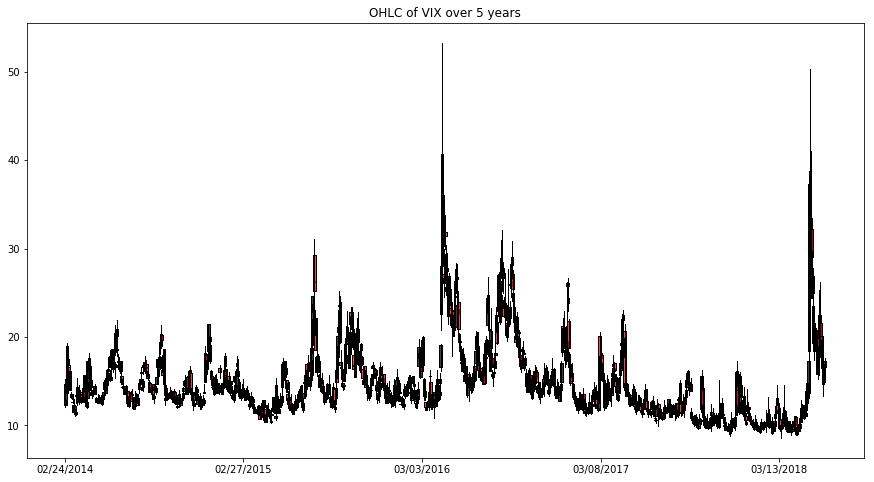

In [60]:
fig, ax = plt.subplots()
fig.set_size_inches(w=15,h=8,forward=True)
candlestick2_ohlc(ax,vix_df['VIX Open'],vix_df['VIX High'],vix_df['VIX Low'],vix_df['VIX Close'])
plt.title('OHLC of VIX over 5 years')

num_ticks = 5

inv_ticks = int(len(vix_df['Date'])/num_ticks)
plt.xticks([i for i in range(num_ticks)],[vix_df['Date'][inv_ticks*i] for i in range(num_ticks+1)])
ax.xaxis.set_major_locator(ticker.MaxNLocator(num_ticks))
plt.show()

In [61]:
# Finding times when the VIX was unusually high
vix_threshold = 22
last_index=0

high_vix = pd.DataFrame(vix_df[['Date','VIX Open']][vix_df['VIX Open']>=vix_threshold])
high_vix.reset_index(inplace=True)

unique_high_vix = pd.DataFrame(columns=[['Date','Open']])

# Finds dates when the VIX rises above the threshold, then stops checking until the next time it stabilizes
for index, date, val in high_vix.values:
    if(index==last_index+1):
        last_index=index
    else:
        unique_high_vix.set_value(index=index,col='Date',value=date)
        unique_high_vix.set_value(index=index,col='Open',value=val)
        last_index=index

unique_high_vix

,Date,Open
417,10/14/2014,23.77
421,10/20/2014,22.11
461,12/16/2014,23.55
480,01/14/2015,22.87
482,01/16/2015,22.8
632,08/21/2015,22.55
651,09/18/2015,23.07
653,09/22/2015,22.97
657,09/28/2015,25.02
711,12/14/2015,24.7


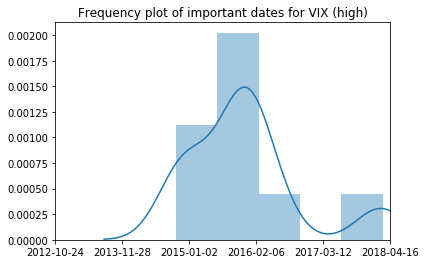

In [62]:
datetime_list_vix = [datetime.datetime.strptime(x,'%m/%d/%Y') for x in unique_high_vix['Date']]
ordinal_list_vix = [x.toordinal() for x in datetime_list_vix]
ax = sns.distplot(ordinal_list_vix)
ax.set_xlim(left=datetime.datetime.strptime(btc_df['Date'][0], '%Y-%m-%d').toordinal(),right=datetime.datetime.strptime(btc_df['Date'].iloc[-1], '%Y-%m-%d').toordinal())
x_ticks = ax.get_xticks()
ax.set_xticks(x_ticks[::2])
xlabels = [datetime.datetime.fromordinal(int(x)).strftime('%Y-%m-%d') for x in x_ticks[::2]]
ax.set_xticklabels(xlabels)
plt.title('Frequency plot of important dates for VIX (high)')
plt.show()

In [63]:
# Finding times when the VIX was unusually low
vix_threshold = 11
last_index=0

low_vix = pd.DataFrame(vix_df[['Date','VIX Open']][vix_df['VIX Open']<=vix_threshold])
low_vix.reset_index(inplace=True)

unique_low_vix = pd.DataFrame(columns=[['Date','Open']])

# Finds dates when the VIX rises above the threshold, then stops checking until the next time it stabilizes
for index, date, val in low_vix.values:
    if(index==last_index+1):
        last_index=index
    else:
        unique_low_vix.set_value(index=index,col='Date',value=date)
        unique_low_vix.set_value(index=index,col='Open',value=val)
        last_index=index

unique_low_vix

,Date,Open
336,06/19/2014,10.53
346,07/03/2014,10.47
354,07/16/2014,10.81
991,01/25/2017,10.79
1003,02/10/2017,10.85
1006,02/15/2017,10.84
1053,04/25/2017,10.81
1073,05/23/2017,11
1088,06/14/2017,10.33
1090,06/16/2017,10.63


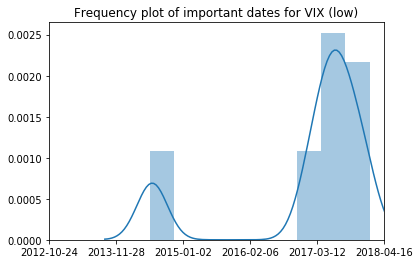

In [64]:
datetime_list_vix = [datetime.datetime.strptime(x,'%m/%d/%Y') for x in unique_low_vix['Date']]
ordinal_list_vix = [x.toordinal() for x in datetime_list_vix]
ax = sns.distplot(ordinal_list_vix)
ax.set_xlim(left=datetime.datetime.strptime(btc_df['Date'][0], '%Y-%m-%d').toordinal(),right=datetime.datetime.strptime(btc_df['Date'].iloc[-1], '%Y-%m-%d').toordinal())
x_ticks = ax.get_xticks()
ax.set_xticks(x_ticks[::2])
xlabels = [datetime.datetime.fromordinal(int(x)).strftime('%Y-%m-%d') for x in x_ticks[::2]]
ax.set_xticklabels(xlabels)
plt.title('Frequency plot of important dates for VIX (low)')
plt.show()